<a href="https://colab.research.google.com/github/Mrcl3/OVbIQq5eMxriAbI0/blob/master/term_deposit_marketig_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Background**:

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

**Data Description:**

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

**Attributes:**

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

**Output (desired target):**

y - has the client subscribed to a term deposit? (binary)

In [ ]:
!pip install lazypredict
!pip install shap
!pip install pycaret
!pip install scikit-learn-intelex


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from scipy import stats
import xgboost as xgb
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import confusion_matrix
from pycaret.classification import *
from imblearn.over_sampling import SMOTE


np.random.seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Aprziva/second_project/term-deposit-marketing-2020.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign
count,40000.00,40000.00,40000.00,40000.00,40000.00
mean,40.54,1274.28,16.02,254.82,2.88
std,9.64,2903.77,8.28,259.37,3.24
min,19.00,-8019.00,1.00,0.00,1.00
25%,33.00,54.00,8.00,100.00,1.00
50%,39.00,407.00,17.00,175.00,2.00
75%,48.00,1319.00,21.00,313.00,3.00
max,95.00,102127.00,31.00,4918.00,63.00


In [ ]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  da

In [ ]:
column_types = df.dtypes
column_types

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [ ]:
target_counts = df['y'].value_counts()
class_balance = target_counts / len(df) * 100
target_counts
#class_balance

no     37104
yes     2896
Name: y, dtype: int64

The dat seems to be imbalanced...

In [ ]:
X = df.drop('y', axis=1)
Y = df['y']

In [ ]:
numeric_df = X.select_dtypes(include=['int64']).copy()
cols = numeric_df.columns
numeric_features = list(cols)
numeric_features


['age', 'balance', 'day', 'duration', 'campaign']

In [ ]:
categorical_df = X.select_dtypes(include=['object']).copy()
cols = categorical_df.columns
categorical_features = list(cols)
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1


# Analysis of numerical data

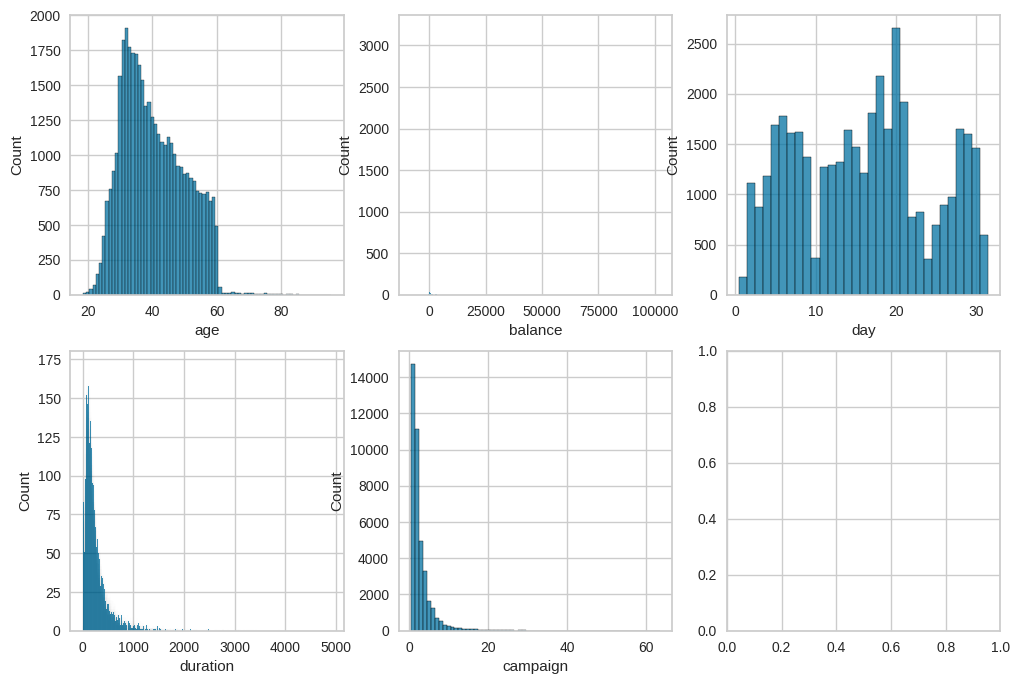

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(12, 8))
i = 0
for items in numeric_df.columns[:5]:
  sns.histplot(data=numeric_df, x=items, ax=ax[i // 3, i % 3], discrete=True)
  i += 1


In [ ]:
imputer = SimpleImputer(strategy="median")

imp_numeric_df = imputer.fit_transform(numeric_df)

scaler = StandardScaler()

scaled_numeric_df = scaler.fit_transform(imp_numeric_df)

X_categorical_encoded_df = pd.DataFrame(scaled_numeric_df, columns=numeric_features)

X_categorical_encoded_df


,age,balance,day,duration,campaign
0,1.81,0.30,-1.33,0.02,-0.58
1,0.36,-0.43,-1.33,-0.40,-0.58
2,-0.78,-0.44,-1.33,-0.69,-0.58
3,0.67,0.08,-1.33,-0.63,-0.58
4,-0.78,-0.44,-1.33,-0.22,-0.58
...,...,...,...,...,...
39995,1.29,-0.30,-1.57,-0.57,-0.58
39996,-1.09,0.71,-1.57,-0.06,0.04
39997,1.40,-0.37,-1.57,-0.33,-0.58
39998,-0.68,-0.08,-1.57,0.34,-0.58


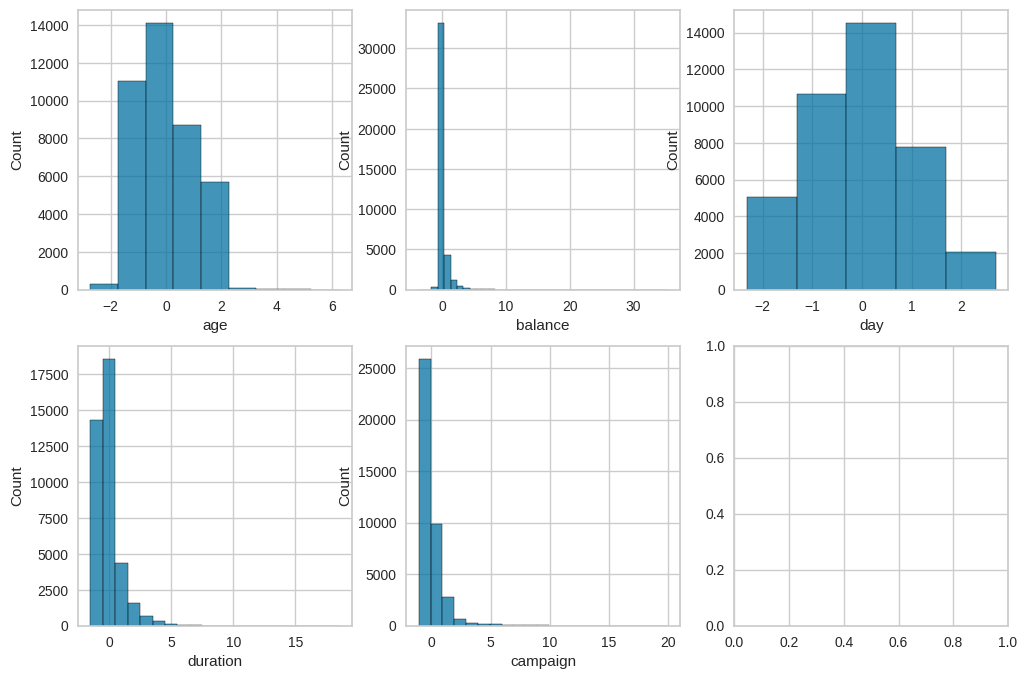

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, item in enumerate(numeric_df.columns[:5]):
    if i < 5:
        sns.histplot(data=X_categorical_encoded_df, x=item, ax=ax[i // 3, i % 3], discrete=True)
    else:
        ax[i // 3, i % 3].axis("off")


# Transform target variable to numerical ones

In [ ]:
transformer = LabelEncoder()

Y = transformer.fit_transform(Y)
Y1 = pd.DataFrame(Y, columns=['y'])
Y1.head()

,y
0,0
1,0
2,0
3,0
4,0


<Axes: xlabel='y', ylabel='Count'>

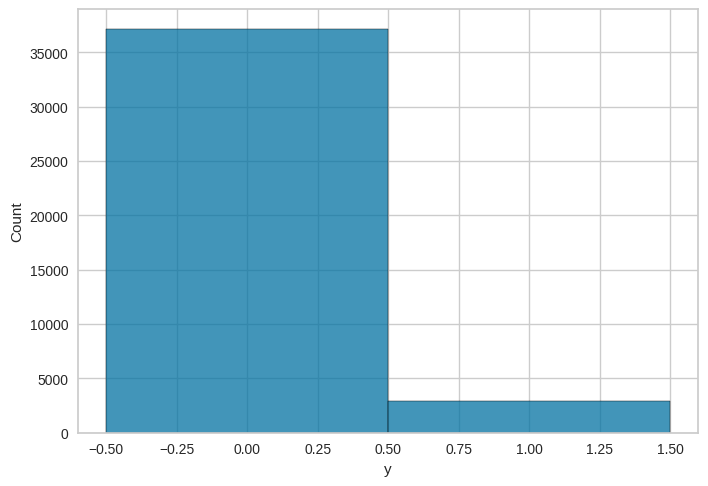

In [ ]:
sns.histplot(data=Y1, x=Y1['y'], discrete=True)

Data seems to be imbalanced, to address this problem I will discuss three approaches:

*   Oversampling with SMOTE
*   Upsampling minority class
*   Adjusting class weights



# Build a pipiline for the preprocessing and model    

Let's try building a model without any data augmentation and see how it performs

In [ ]:

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder()),
        ("selector", SelectPercentile(chi2, percentile=95)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

clf


In [ ]:


clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

model = clf.fit(X_train, y_train)


print("model score: %.3f" % clf.score(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred1 = model.predict(X_train)
# Calculate evaluation metrics
trained_accuracy = accuracy_score(y_train, y_pred1)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print(f'Model: Logistic Regression')
print(f'Trained data accuracy: {trained_accuracy:.4f}')   
print(f'Test data accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('---')

# Assuming you have the true labels 'y_true' and the predicted labels 'y_pred'
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


# Display the plot
plt.show()

In [ ]:
clf1 = setup(X, target = Y, session_id=786)

,Description,Value
0,Session id,786
1,Target,target
2,Target type,Binary
3,Original data shape,"(40000, 14)"
4,Transformed data shape,"(40000, 42)"
5,Transformed train set shape,"(28000, 42)"
6,Transformed test set shape,"(12000, 42)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,8


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9372,0.9433,0.3547,0.6157,0.4492,0.4185,0.4369,4.8760
lightgbm,Light Gradient Boosting Machine,0.9363,0.9493,0.4070,0.5883,0.4802,0.4476,0.4567,1.0360
rf,Random Forest Classifier,0.9354,0.9377,0.2995,0.6130,0.4013,0.3715,0.3988,4.1740
xgboost,Extreme Gradient Boosting,0.9344,0.9453,0.4050,0.5670,0.4719,0.4381,0.4454,6.4230
lr,Logistic Regression,0.9340,0.9217,0.2610,0.6027,0.3634,0.3344,0.3676,4.3630
lda,Linear Discriminant Analysis,0.9329,0.9281,0.4238,0.5484,0.4775,0.4423,0.4468,0.6060
et,Extra Trees Classifier,0.9329,0.9222,0.2442,0.5885,0.3440,0.3151,0.3498,4.4350
ridge,Ridge Classifier,0.9317,0.0000,0.1436,0.6243,0.2329,0.2117,0.2766,0.4310
ada,Ada Boost Classifier,0.9300,0.9287,0.3108,0.5309,0.3910,0.3566,0.3716,1.8250
dummy,Dummy Classifier,0.9276,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=786, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The model has a very good accuracy, but in case of a imbalanced data it make more sense to look at the F1 parameter which combines precision and recall. F1 of 50% is not a good result of a model and data augmentation should be used.

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9404,0.9549,0.3663,0.6549,0.4698,0.4409,0.4619
1,0.9336,0.9337,0.2426,0.5976,0.3451,0.3166,0.3527
2,0.9386,0.9404,0.3069,0.6596,0.4189,0.3910,0.4232
3,0.9296,0.9313,0.3153,0.5246,0.3938,0.3590,0.3721
4,0.9396,0.9303,0.3054,0.6889,0.4232,0.3963,0.4332
5,0.9296,0.9271,0.2709,0.5288,0.3583,0.3252,0.3456
6,0.9389,0.9437,0.3251,0.6600,0.4356,0.4073,0.4360
7,0.9354,0.9355,0.2759,0.6222,0.3823,0.3535,0.3863
8,0.9379,0.9437,0.3103,0.6495,0.4200,0.3915,0.4215


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

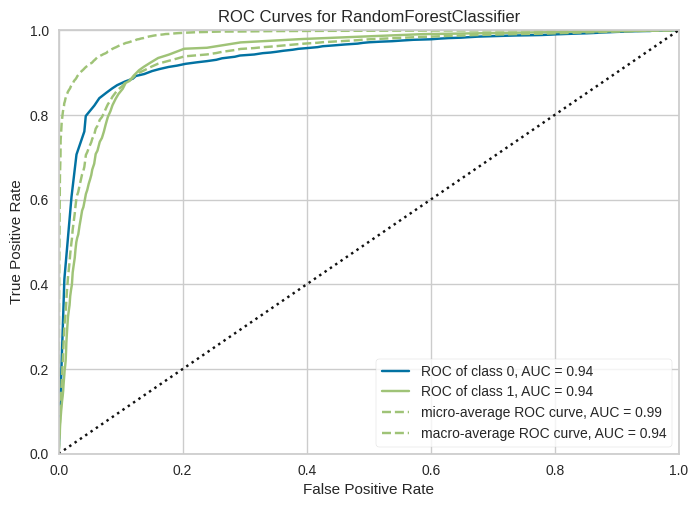

In [ ]:
plot_model(rf)

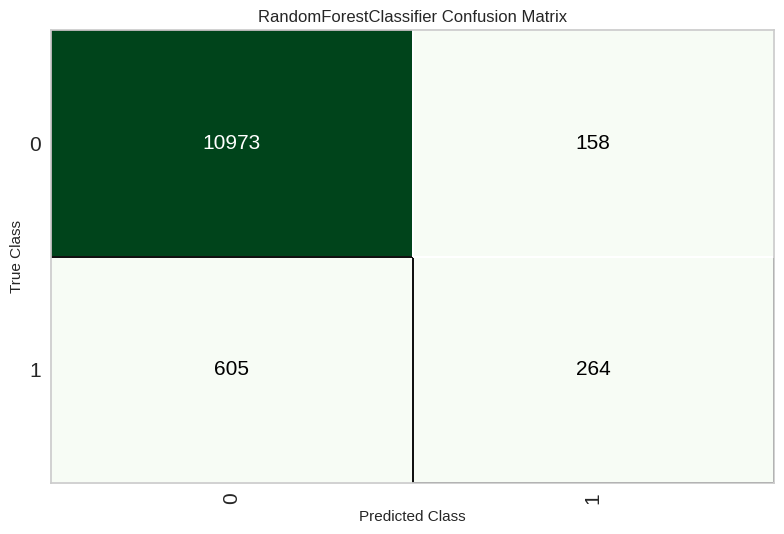

In [ ]:
plot_model(rf, plot = 'confusion_matrix')

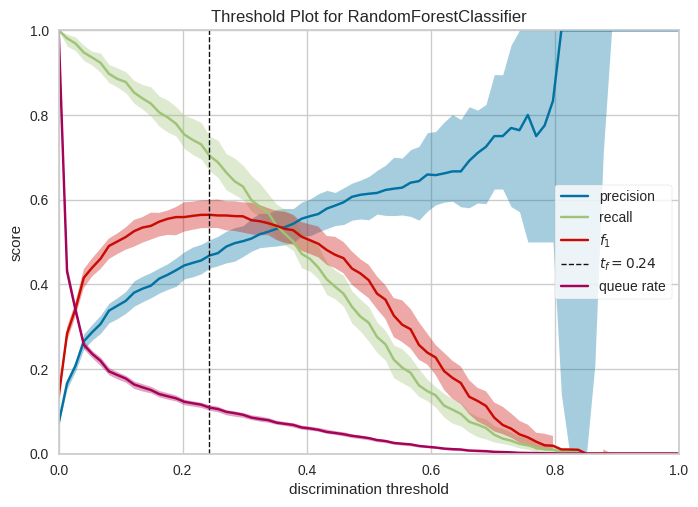

In [ ]:
plot_model(rf, plot = 'threshold')

# Preprocess for SMOTE

In [ ]:

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Apply one-hot encoding to the categorical features
X_categorical_encoded = encoder.fit_transform(categorical_df).toarray()

# Get the feature names for the encoded categorical features
categorical_feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# Create a DataFrame for the encoded categorical features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)

X_encoded = pd.concat([numeric_df, X_categorical_encoded_df], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=0, stratify=Y)

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class
smote = SMOTE(random_state=0)

# Resample the dataset using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Count the class distribution before applying SMOTE
unique_classes, class_counts = np.unique(Y, return_counts=True)
print("Class distribution before SMOTE:", dict(zip(unique_classes, class_counts)))

# Count the class distribution after applying SMOTE
unique_classes_resampled, class_counts_resampled = np.unique(y_resampled, return_counts=True)
print("Class distribution after SMOTE:", dict(zip(unique_classes_resampled, class_counts_resampled)))



Class distribution before SMOTE: {0: 37104, 1: 2896}
Class distribution after SMOTE: {0: 29683, 1: 29683}


In [ ]:
from imblearn.over_sampling import SMOTE

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("selector", SelectPercentile(chi2, percentile=95)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

clf

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('scale...
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign'])],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

model score: 0.840
Model: Logistic Regression
Trained data accuracy: 0.7977
Test data accuracy: 0.8399
Precision: 0.2721
Recall: 0.7237
F1 Score: 0.3955
ROC AUC Score: 0.8621
---


Text(0.5, 1.0, 'Confusion Matrix')

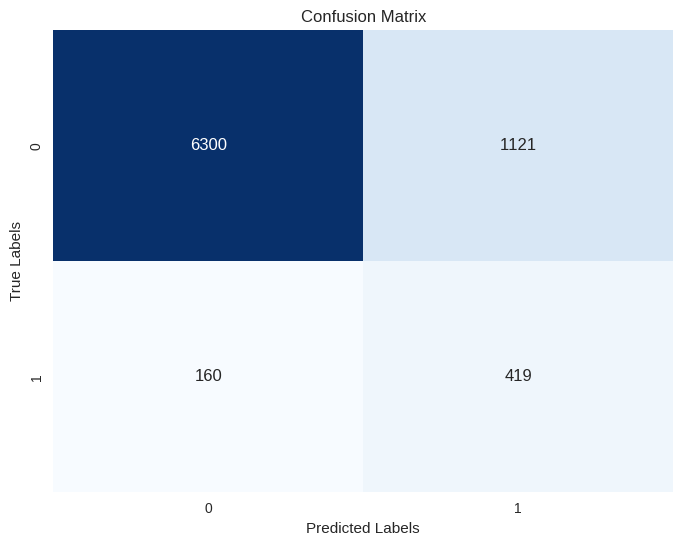

In [ ]:

model = clf.fit(X_resampled, y_resampled)

print("model score: %.3f" % clf.score(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)
# Make predictions on the train set
y_pred1 = model.predict(X_resampled)
# Calculate evaluation metrics
trained_accuracy = accuracy_score(y_resampled, y_pred1)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print(f'Model: Logistic Regression')
print(f'Trained data accuracy: {trained_accuracy:.4f}')   
print(f'Test data accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('---')

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


In [ ]:
clf2 = setup(X_resampled, target = y_resampled, session_id=786)

,Description,Value
0,Session id,786
1,Target,target
2,Target type,Binary
3,Original data shape,"(59366, 45)"
4,Transformed data shape,"(59366, 45)"
5,Transformed train set shape,"(41556, 45)"
6,Transformed test set shape,"(17810, 45)"
7,Numeric features,44
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9678,0.9955,0.9559,0.9792,0.9674,0.9356,0.9358,6.7710
lightgbm,Light Gradient Boosting Machine,0.9663,0.9961,0.9586,0.9737,0.9661,0.9327,0.9328,1.5150
rf,Random Forest Classifier,0.9660,0.9958,0.9512,0.9802,0.9655,0.9319,0.9324,5.7910
xgboost,Extreme Gradient Boosting,0.9652,0.9959,0.9570,0.9729,0.9649,0.9304,0.9305,12.4230
gbc,Gradient Boosting Classifier,0.9601,0.9947,0.9571,0.9628,0.9599,0.9201,0.9201,12.1900
dt,Decision Tree Classifier,0.9520,0.9520,0.9554,0.9490,0.9522,0.9040,0.9041,0.9460
ada,Ada Boost Classifier,0.9513,0.9919,0.9442,0.9579,0.9510,0.9027,0.9028,3.4790
knn,K Neighbors Classifier,0.8816,0.9432,0.9510,0.8351,0.8893,0.7632,0.7707,2.4440
lr,Logistic Regression,0.8766,0.9384,0.8859,0.8697,0.8777,0.7532,0.7533,5.4530
ridge,Ridge Classifier,0.8695,0.0000,0.8606,0.8763,0.8683,0.7390,0.7392,0.6150


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=786, verbose=0, warm_start=False)

In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9678,0.9961,0.9562,0.9788,0.9674,0.9355,0.9358
1,0.9694,0.9960,0.9567,0.9817,0.9690,0.9389,0.9392
2,0.9658,0.9961,0.9543,0.9768,0.9654,0.9317,0.9319
3,0.9704,0.9964,0.9591,0.9813,0.9701,0.9408,0.9410
4,0.9678,0.9957,0.9562,0.9788,0.9674,0.9355,0.9358
5,0.9670,0.9956,0.9514,0.9821,0.9665,0.9341,0.9345
6,0.9670,0.9943,0.9557,0.9778,0.9667,0.9341,0.9343
7,0.9668,0.9948,0.9528,0.9802,0.9663,0.9336,0.9339
8,0.9716,0.9948,0.9644,0.9785,0.9714,0.9432,0.9433


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predictions = predict_model(et, X_test)
predictions

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,prediction_label,prediction_score
34247,44,4236,4,378,3,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0,0.75
11609,38,435,19,117,2,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0,1.00
1814,28,101,9,224,3,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0,1.00
29242,29,642,2,156,3,0.00,0.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.79
16895,50,556,25,305,1,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37018,47,-98,13,211,1,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0,0.99
11470,55,1580,19,1007,1,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0,0.64
35092,38,427,6,17,3,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0,0.97
28751,42,936,30,931,1,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.67


In [ ]:
# Calculate and print evaluation metrics
f1 = f1_score(y_test, predictions['prediction_label'], average='weighted')
accuracy = accuracy_score(y_test, predictions['prediction_label'])
auroc = roc_auc_score(y_test, predictions['prediction_label'])
confusion_mat = confusion_matrix(y_test, predictions['prediction_label'])

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("AUROC:", auroc)
print("Confusion Matrix:")

F1 Score: 0.9265194694653962
Accuracy: 0.93425
AUROC: 0.6628072461127097
Confusion Matrix:


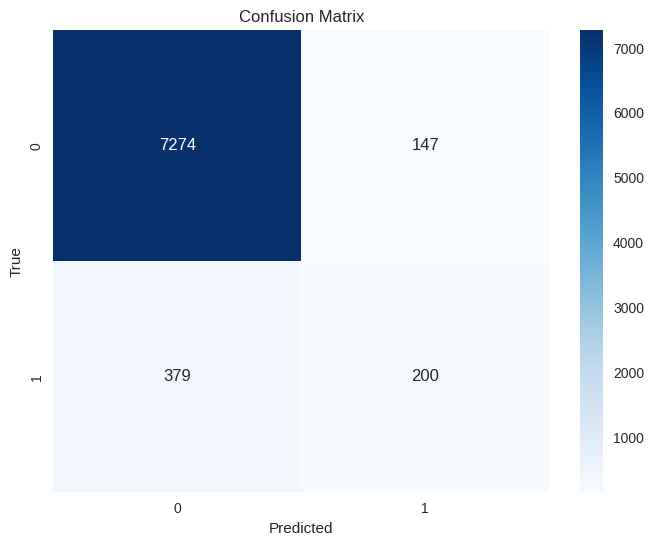

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels='01', yticklabels='01')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

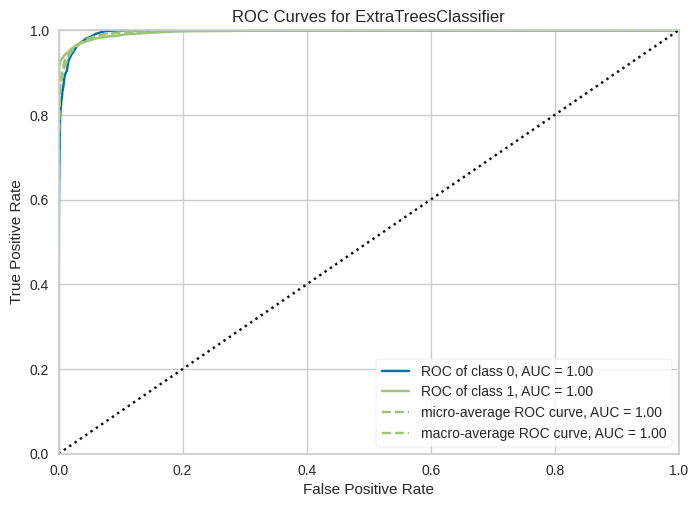

In [ ]:
plot_model(et)

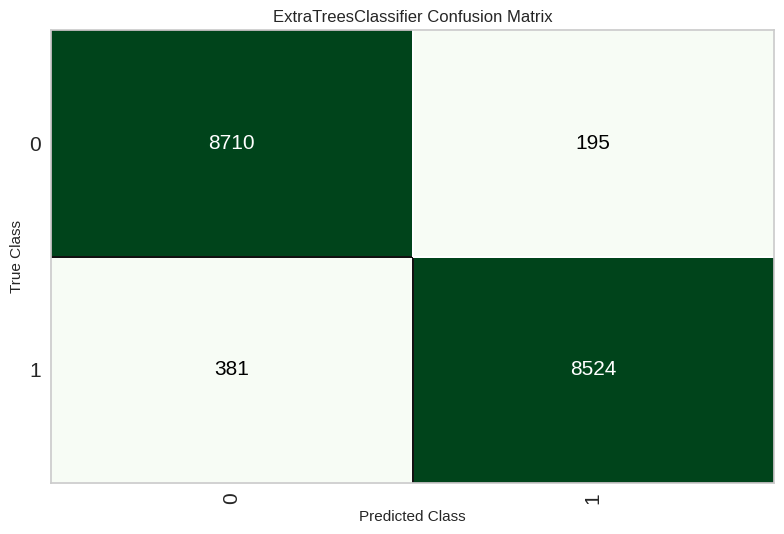

In [ ]:
plot_model(et, plot = 'confusion_matrix')

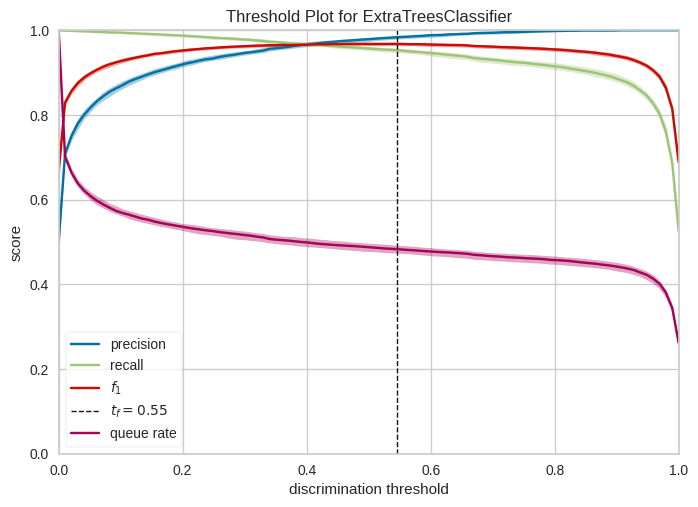

In [ ]:
plot_model(et, plot = 'threshold')

Feature ranking:
1. Feature duration (0.17645989062913917)
2. Feature contact_cellular (0.05483242269324966)
3. Feature contact_unknown (0.051704668882947884)
4. Feature education_secondary (0.04888472326896839)
5. Feature housing_yes (0.04693811586096463)
6. Feature marital_married (0.04621174724593289)
7. Feature housing_no (0.04537583623252914)
8. Feature marital_single (0.04019914867047223)
9. Feature education_tertiary (0.036681939702635884)
10. Feature month_may (0.0363998428225269)
11. Feature month_apr (0.035399079074169844)
12. Feature job_blue-collar (0.027143363543715524)
13. Feature month_aug (0.025944681129328028)


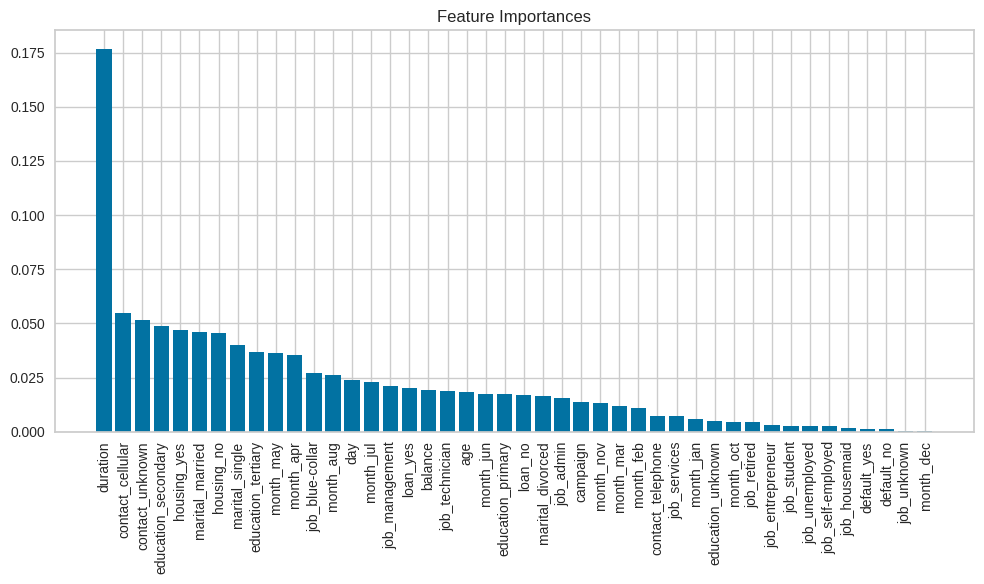

In [ ]:
# Retrieve the feature importances from the trained model
importances = et.feature_importances_

# Sort the importances in descending order and get the corresponding feature indices
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X_resampled.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_resampled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_resampled.shape[1]), X_resampled.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Upsample minority class

In [103]:
Y = transformer.fit_transform(df['y'])
df['y'] = Y

In [104]:
# Apply one-hot encoding to the categorical features
X_categorical_encoded = encoder.fit_transform(categorical_df).toarray()

# Get the feature names for the encoded categorical features
categorical_feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# Create a DataFrame for the encoded categorical features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)

data_encoded = pd.concat([numeric_df, X_categorical_encoded_df], axis=1)
data_encoded['y'] = Y

In [105]:
data_train, data_test = train_test_split(data_encoded, test_size=0.2, random_state=0, stratify=Y)

In [106]:
from sklearn.utils import resample


# Separate majority and minority classes
df_majority = data_train[data_train['y']==0]
df_minority = data_train[data_train['y']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=int(len(df_majority)),    # to match majority class
                                 random_state=1) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.reset_index(inplace=True, drop=True)
# Display new class counts
df_upsampled.balance.value_counts()

0        4372
2         199
1         198
3         185
4         180
         ... 
8592        1
3938        1
10142       1
6808        1
18268       1
Name: balance, Length: 6271, dtype: int64

In [107]:
X_train = df_upsampled.drop('y', axis=1)
Y_train = df_upsampled['y']
X_test = data_test.drop('y', axis=1)
y_test = data_test['y']

model score: 0.843
Model: Logistic Regression
Trained data accuracy: 0.8017
Test data accuracy: 0.8434
Precision: 0.2771
Recall: 0.7237
F1 Score: 0.4008
ROC AUC Score: 0.8671
---


Text(0.5, 1.0, 'Confusion Matrix')

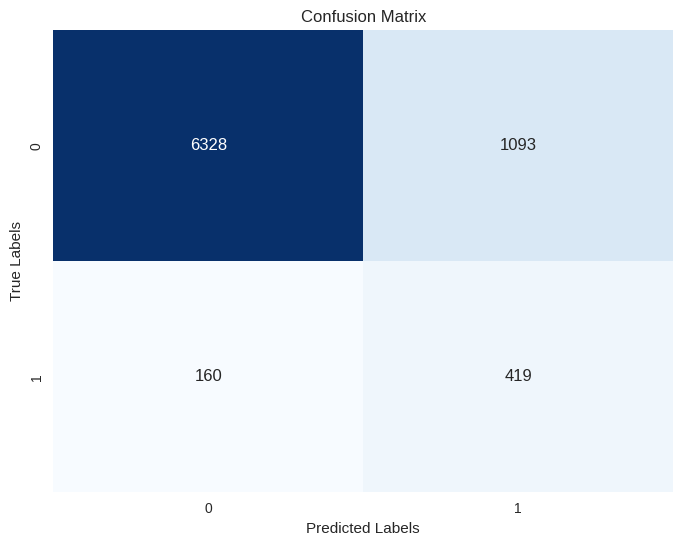

In [108]:
model = clf.fit(X_train, Y_train)

print("model score: %.3f" % clf.score(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)
# Make predictions on the train set
y_pred1 = model.predict(X_resampled)
# Calculate evaluation metrics
trained_accuracy = accuracy_score(y_resampled, y_pred1)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print(f'Model: Logistic Regression')
print(f'Trained data accuracy: {trained_accuracy:.4f}')   
print(f'Test data accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('---')

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


In [109]:
clf2 = setup(X_train, target = Y_train, session_id=786)

,Description,Value
0,Session id,786
1,Target,y
2,Target type,Binary
3,Original data shape,"(59366, 45)"
4,Transformed data shape,"(59366, 45)"
5,Transformed train set shape,"(41556, 45)"
6,Transformed test set shape,"(17810, 45)"
7,Numeric features,44
8,Preprocess,True
9,Imputation type,simple


In [110]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9885,0.9999,0.9997,0.9779,0.9887,0.9771,0.9773,1.8440
rf,Random Forest Classifier,0.9776,1.0000,0.9998,0.9573,0.9781,0.9552,0.9561,1.0930
dt,Decision Tree Classifier,0.9705,0.9705,0.9997,0.9447,0.9714,0.9411,0.9427,0.2590
xgboost,Extreme Gradient Boosting,0.9512,0.9820,0.9903,0.9185,0.9530,0.9024,0.9052,0.2910
lightgbm,Light Gradient Boosting Machine,0.9319,0.9718,0.9754,0.8973,0.9347,0.8637,0.8670,0.4350
knn,K Neighbors Classifier,0.9192,0.9631,0.9956,0.8637,0.9250,0.8385,0.8484,2.4600
gbc,Gradient Boosting Classifier,0.8961,0.9504,0.9193,0.8785,0.8985,0.7922,0.7931,0.4220
ada,Ada Boost Classifier,0.8701,0.9355,0.8671,0.8723,0.8696,0.7401,0.7402,0.3590
lr,Logistic Regression,0.8675,0.9323,0.8709,0.8651,0.8679,0.7350,0.7351,1.2500
ridge,Ridge Classifier,0.8573,0.0000,0.8296,0.8783,0.8532,0.7146,0.7157,0.2880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=786, verbose=0, warm_start=False)

In [111]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9880,1.0000,1.0000,0.9765,0.9881,0.9759,0.9762
1,0.9892,1.0000,1.0000,0.9788,0.9893,0.9783,0.9786
2,0.9882,1.0000,1.0000,0.9770,0.9883,0.9764,0.9767
3,0.9904,1.0000,1.0000,0.9811,0.9905,0.9808,0.9809
4,0.9877,0.9999,0.9995,0.9765,0.9879,0.9755,0.9757
5,0.9906,0.9999,0.9995,0.9820,0.9907,0.9812,0.9814
6,0.9875,0.9996,0.9981,0.9774,0.9876,0.9750,0.9752
7,0.9877,1.0000,1.0000,0.9760,0.9879,0.9755,0.9757
8,0.9880,1.0000,1.0000,0.9765,0.9881,0.9759,0.9762


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [115]:
predictions = predict_model(et, X_test)

# Calculate and print evaluation metrics
f1 = f1_score(y_test, predictions['prediction_label'])
accuracy = accuracy_score(y_test, predictions['prediction_label'])
auroc = roc_auc_score(y_test, predictions['prediction_label'])
confusion_mat = confusion_matrix(y_test, predictions['prediction_label'])

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("AUROC:", auroc)

F1 Score: 0.4192513368983958
Accuracy: 0.932125
AUROC: 0.6584771219423756


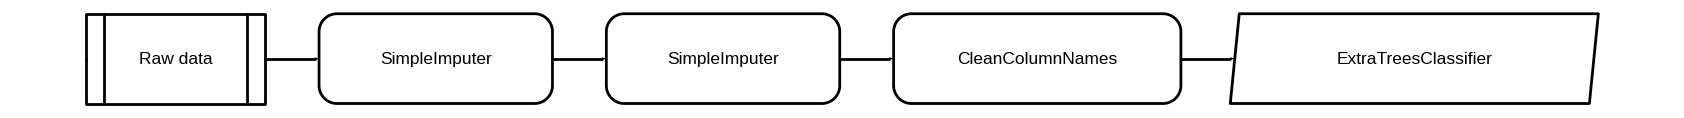

In [ ]:
evaluate_model(et)

Feature ranking:
1. Feature duration (0.37320345086100604)
2. Feature day (0.08281743440857517)
3. Feature age (0.07268925370495202)
4. Feature balance (0.06700045457953334)
5. Feature campaign (0.05261994204712941)
6. Feature month_apr (0.02237822001610785)
7. Feature contact_unknown (0.018260917904827405)
8. Feature contact_cellular (0.016314553454884976)
9. Feature month_mar (0.013991923224409277)
10. Feature job_technician (0.012617527651061975)
11. Feature education_secondary (0.011875434130282258)
12. Feature month_jul (0.011779979418145264)
13. Feature housing_no (0.011775950409411323)


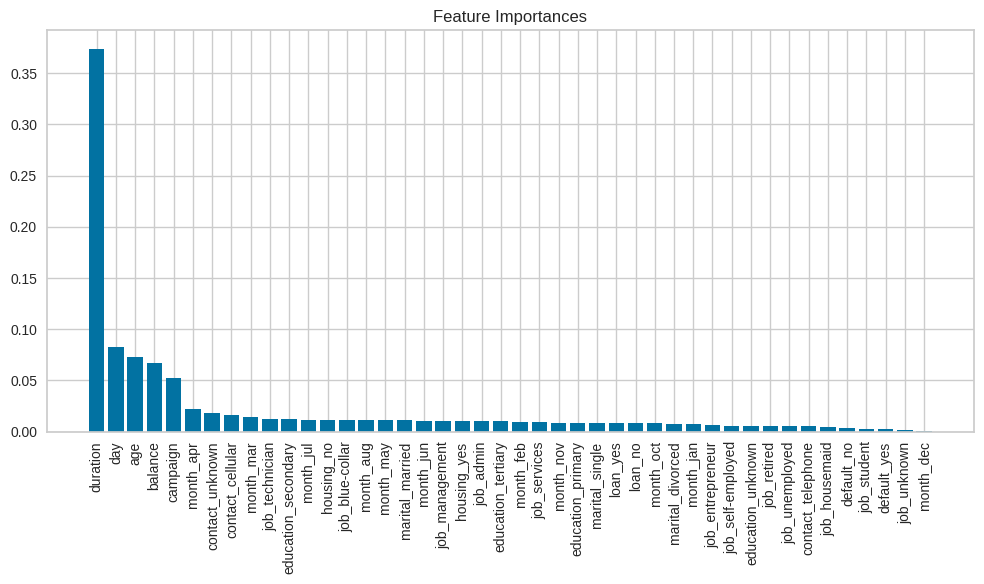

In [ ]:
# Retrieve the feature importances from the trained model
importances = et.feature_importances_

# Sort the importances in descending order and get the corresponding feature indices
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X_resampled.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_resampled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_resampled.shape[1]), X_resampled.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import shap
X_test_sample = X_test.sample(frac=0.1, random_state=42)
# Calculate SHAP values
explainer = shap.Explainer(et)
shap_values = explainer.shap_values(X_test_sample)


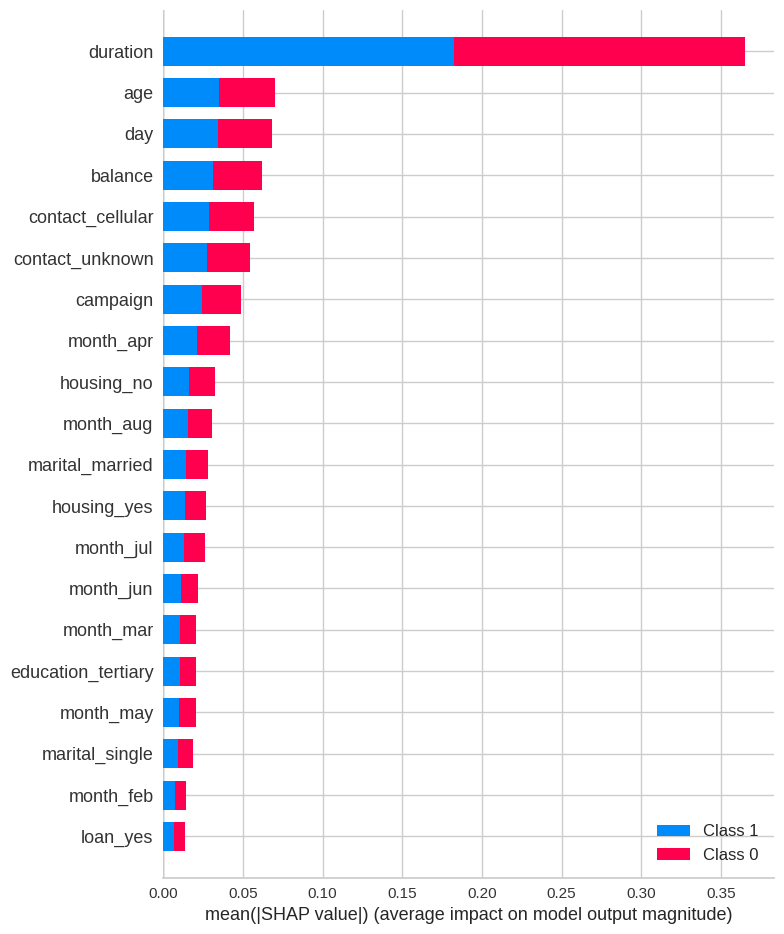

In [ ]:
shap.summary_plot(shap_values, X_test_sample, feature_names=X_test_sample.columns, plot_type='bar')


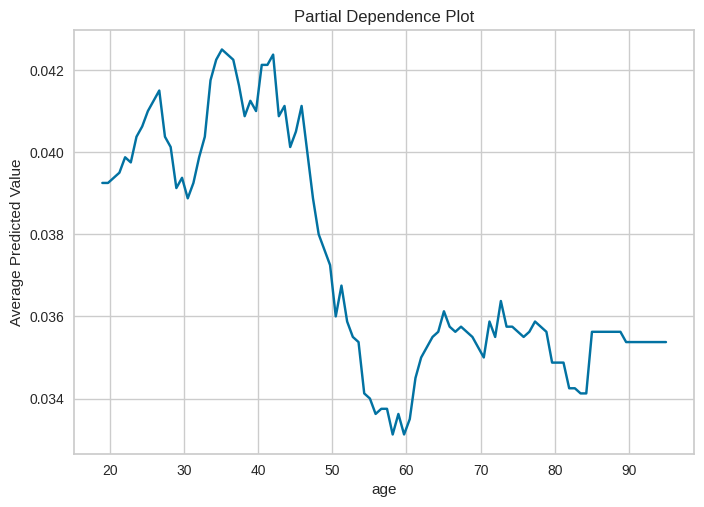

In [ ]:
# Define the values for the feature
feature_values = np.linspace(X['age'].min(), X['age'].max(), num=100)

# Initialize an array to store the average predictions
average_predictions = np.zeros_like(feature_values)

# Iterate over the feature values and calculate the average predictions
for i, value in enumerate(feature_values):
    X_temp = X_test.copy()
    X_temp['age'] = value
    predictions = et.predict(X_temp)
    average_predictions[i] = np.mean(predictions)

# Plot the PDP
plt.plot(feature_values, average_predictions)
plt.xlabel('age')
plt.ylabel('Average Predicted Value')
plt.title('Partial Dependence Plot')
plt.show()


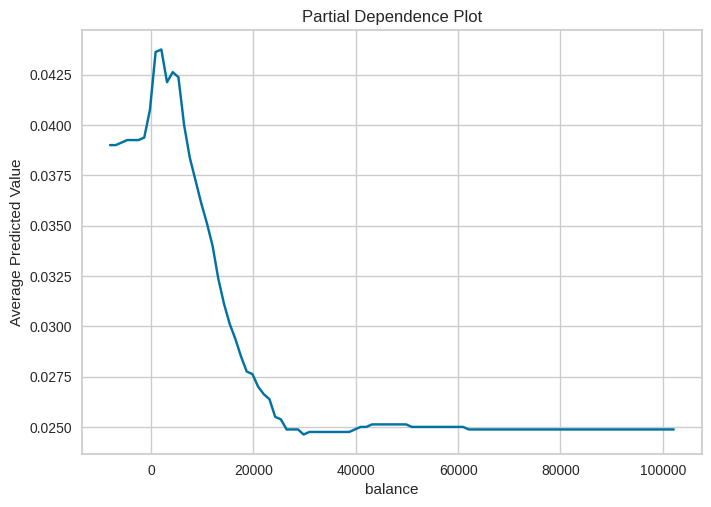

In [ ]:
# Define the values for the feature
feature_values = np.linspace(X['balance'].min(), X['balance'].max(), num=100)

# Initialize an array to store the average predictions
average_predictions = np.zeros_like(feature_values)

# Iterate over the feature values and calculate the average predictions
for i, value in enumerate(feature_values):
    X_temp = X_test.copy()
    X_temp['balance'] = value
    predictions = et.predict(X_temp)
    average_predictions[i] = np.mean(predictions)

# Plot the PDP
plt.plot(feature_values, average_predictions)
plt.xlabel('balance')
plt.ylabel('Average Predicted Value')
plt.title('Partial Dependence Plot')
plt.show()


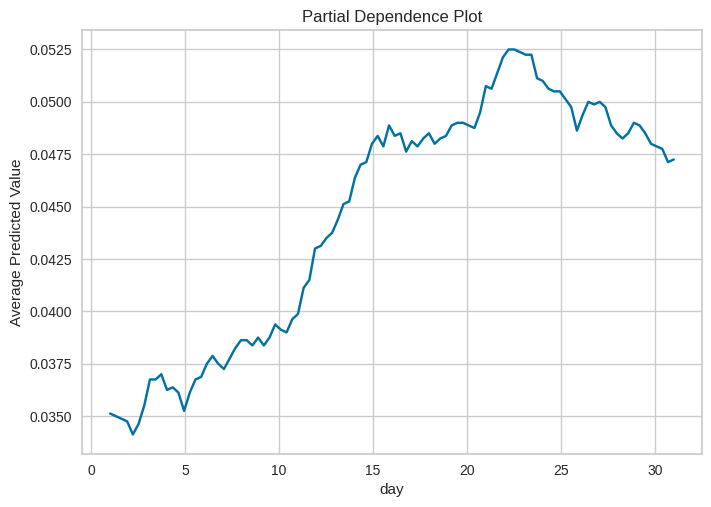

In [ ]:
# Define the values for the feature
feature_values = np.linspace(X['day'].min(), X['day'].max(), num=100)

# Initialize an array to store the average predictions
average_predictions = np.zeros_like(feature_values)

# Iterate over the feature values and calculate the average predictions
for i, value in enumerate(feature_values):
    X_temp = X_test.copy()
    X_temp['day'] = value
    predictions = et.predict(X_temp)
    average_predictions[i] = np.mean(predictions)

# Plot the PDP
plt.plot(feature_values, average_predictions)
plt.xlabel('day')
plt.ylabel('Average Predicted Value')
plt.title('Partial Dependence Plot')
plt.show()


* We can see that the most important feature is how long the customer is in contact with the company. 

* It's important to contact the customers, otherwise they probably won't take any action on their own.

* Poeple up to 45 years old are also more likely to subscribe

* The second half of the month seems to be also a better time to subscribe

* Poeple with relatively low balance are also more likely

* Other features have relatively lower influence.

## Summary for the upsampling minority class 

In [ ]:
predictions = predict_model(et, X_test)

# Calculate and print evaluation metrics
f1 = f1_score(y_test, predictions['prediction_label'], average='macro')
f1_2 = f1_score(y_test, predictions['prediction_label'], average='micro')
f1_zero = f1_score(y_test, predictions['prediction_label'], average='binary', pos_label=0)
f1_one = f1_score(y_test, predictions['prediction_label'], average='binary', pos_label=1)
accuracy = accuracy_score(y_test, predictions['prediction_label'])
auroc = roc_auc_score(y_test, predictions['prediction_label'])
confusion_mat = confusion_matrix(y_test, predictions['prediction_label'])

print("F1 Score (Calculate metrics for each label, and find their unweighted mean.):", f1)
print("F1 Score (Calculate metrics globally by counting the total true positives, false negatives and false positives.):", f1_2)
print("F1 Score (only for 0):", f1_zero)
print("F1 Score (only for 1):", f1_one)

print("Accuracy:", accuracy)
print("AUROC:", auroc)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels='01', yticklabels='01')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Adjusting class weights

In [124]:
clf1 = setup(X_encoded, target = Y, session_id=786)

,Description,Value
0,Session id,786
1,Target,target
2,Target type,Binary
3,Original data shape,"(40000, 45)"
4,Transformed data shape,"(40000, 45)"
5,Transformed train set shape,"(28000, 45)"
6,Transformed test set shape,"(12000, 45)"
7,Numeric features,44
8,Preprocess,True
9,Imputation type,simple


In [125]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9372,0.9433,0.3547,0.6157,0.4492,0.4185,0.4369,0.5000
lightgbm,Light Gradient Boosting Machine,0.9363,0.9493,0.4070,0.5883,0.4802,0.4476,0.4567,0.3790
rf,Random Forest Classifier,0.9362,0.9359,0.2970,0.6304,0.4028,0.3737,0.4039,0.6400
xgboost,Extreme Gradient Boosting,0.9348,0.9453,0.4100,0.5701,0.4764,0.4427,0.4498,0.3690
lr,Logistic Regression,0.9336,0.9195,0.2551,0.5976,0.3564,0.3274,0.3612,0.8730
et,Extra Trees Classifier,0.9330,0.9177,0.2393,0.5915,0.3399,0.3113,0.3474,1.0540
lda,Linear Discriminant Analysis,0.9329,0.9281,0.4238,0.5484,0.4775,0.4423,0.4468,0.2310
ridge,Ridge Classifier,0.9317,0.0000,0.1436,0.6243,0.2329,0.2117,0.2766,0.4140
ada,Ada Boost Classifier,0.9300,0.9287,0.3108,0.5309,0.3910,0.3566,0.3716,0.3930
dummy,Dummy Classifier,0.9276,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2190


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=786, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [126]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9375,0.9613,0.4010,0.6000,0.4807,0.4489,0.4592
1,0.9357,0.9431,0.3614,0.5887,0.4479,0.4158,0.4298
2,0.9357,0.9528,0.4406,0.5705,0.4972,0.4635,0.4679
3,0.9304,0.9378,0.4138,0.5250,0.4628,0.4261,0.4296
4,0.9393,0.9494,0.4335,0.6154,0.5087,0.4773,0.4857
5,0.9321,0.9480,0.3793,0.5461,0.4477,0.4128,0.4206
6,0.9379,0.9479,0.4433,0.5960,0.5085,0.4761,0.4820
7,0.9411,0.9509,0.4138,0.6462,0.5045,0.4748,0.4881
8,0.9357,0.9507,0.3547,0.5950,0.4444,0.4126,0.4283


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [127]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [129]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#Setting the range for class weights
weights = np.linspace(0.0,0.99,50)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lightgbm, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(data_train.drop('y', axis=1), data_train['y'])

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})


Fitting 5 folds for each of 50 candidates, totalling 250 fits


<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Scoring for different class weights')

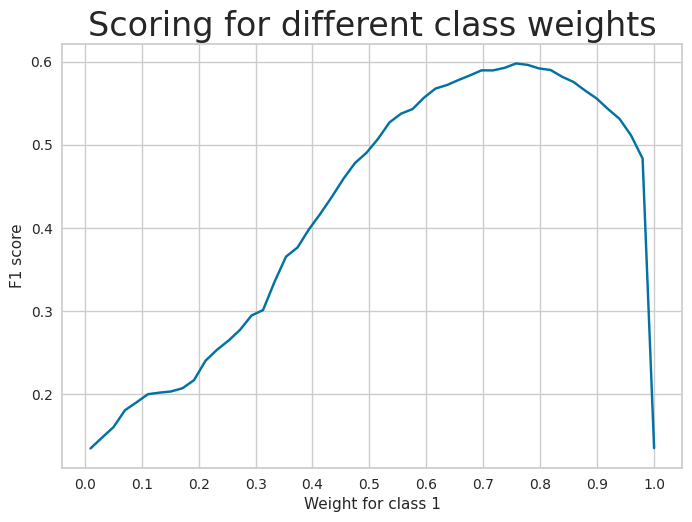

In [130]:
#Plotting the results of the grid search for class weights
sns.lineplot(data=weigh_data, x=weigh_data['weight'], y=weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [131]:
lightgbm = create_model('lightgbm',class_weight={0:0.24, 1:0.76})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9307,0.9598,0.7376,0.5138,0.6057,0.5690,0.5802
1,0.9261,0.9432,0.6832,0.4911,0.5714,0.5322,0.5408
2,0.9314,0.9533,0.7822,0.5163,0.6220,0.5861,0.6014
3,0.9154,0.9392,0.6650,0.4441,0.5325,0.4880,0.5001
4,0.9221,0.9501,0.6847,0.4744,0.5605,0.5193,0.5298
5,0.9175,0.9474,0.6897,0.4545,0.5479,0.5047,0.5180
6,0.9314,0.9501,0.7586,0.5185,0.6160,0.5798,0.5925
7,0.9311,0.9492,0.7192,0.5177,0.6021,0.5654,0.5746
8,0.9304,0.9505,0.6946,0.5146,0.5912,0.5541,0.5615


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [132]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Summary for the class weights

In [133]:
predictions = predict_model(lightgbm, X_test)

# Calculate and print evaluation metrics
f1 = f1_score(y_test, predictions['prediction_label'], average='macro')
f1_2 = f1_score(y_test, predictions['prediction_label'], average='micro')
f1_zero = f1_score(y_test, predictions['prediction_label'], average='binary', pos_label=0)
f1_one = f1_score(y_test, predictions['prediction_label'], average='binary', pos_label=1)
accuracy = accuracy_score(y_test, predictions['prediction_label'])
auroc = roc_auc_score(y_test, predictions['prediction_label'])
confusion_mat = confusion_matrix(y_test, predictions['prediction_label'])

print("F1 Score (Calculate metrics for each label, and find their unweighted mean.):", f1)
print("F1 Score (Calculate metrics globally by counting the total true positives, false negatives and false positives.):", f1_2)
print("F1 Score (only for 0):", f1_zero)
print("F1 Score (only for 1):", f1_one)

print("Accuracy:", accuracy)
print("AUROC:", auroc)

F1 Score (Calculate metrics for each label, and find their unweighted mean.): 0.8143592024916617
F1 Score (Calculate metrics globally by counting the total true positives, false negatives and false positives.): 0.9385
F1 Score (only for 0): 0.9661669646541053
F1 Score (only for 1): 0.6625514403292181
Accuracy: 0.9385
AUROC: 0.890417405304789


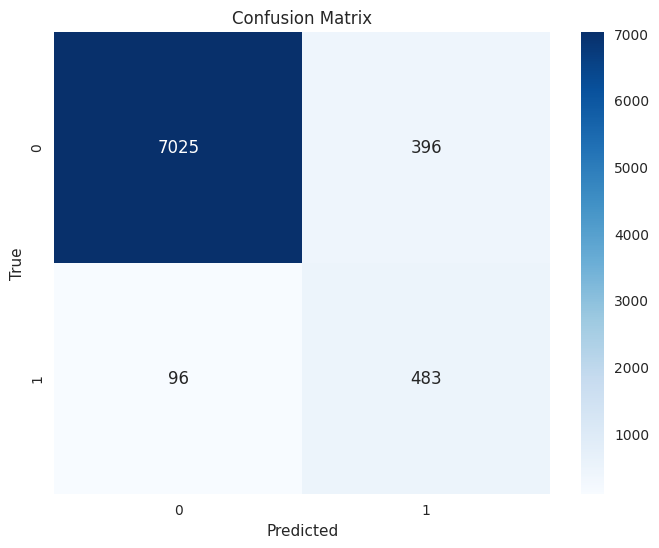

In [134]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels='01', yticklabels='01')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()